In [9]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [10]:
df=pd.read_csv("submission.csv")
df

,id,sales
0,3000888,3.056196
1,3000889,1.445302
2,3000890,13.310976
3,3000891,2216.884255
4,3000892,1.445302
...,...,...
28507,3029395,447.752389
28508,3029396,136.339060
28509,3029397,1984.648576
28510,3029398,147.236049


In [11]:
print(df.columns)

Index(['id', 'sales'], dtype='object')


In [15]:
df.fillna(df.mean(), inplace=True)
df

,id,sales
0,3000888,3.056196
1,3000889,1.445302
2,3000890,13.310976
3,3000891,2216.884255
4,3000892,1.445302
...,...,...
28507,3029395,447.752389
28508,3029396,136.339060
28509,3029397,1984.648576
28510,3029398,147.236049


In [19]:
X = df.drop(columns=['sales']) 
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[-10:] 

Mean Squared Error: 1176927.2393


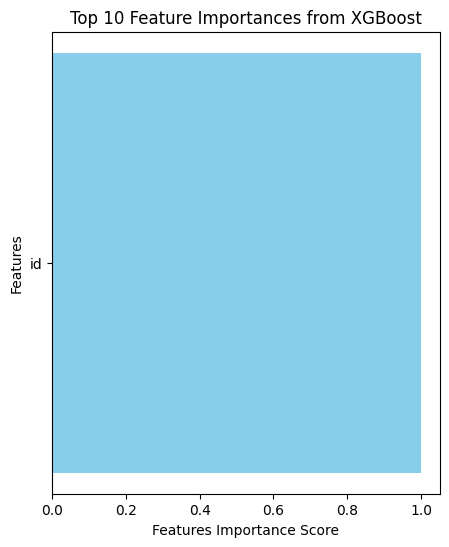

In [27]:
plt.figure(figsize=(5, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], color='skyblue')
plt.xlabel("Features Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances from XGBoost")
plt.show()